In [296]:
#Mushroom Project

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [203]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")      
df.shape

(8124, 23)

In [204]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [205]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [207]:
df.info()        #check for column and null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [208]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [209]:
# Transforming Dataset
for i in df.columns:
    if df[i].dtype=="object":
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


<function matplotlib.pyplot.show(close=None, block=None)>

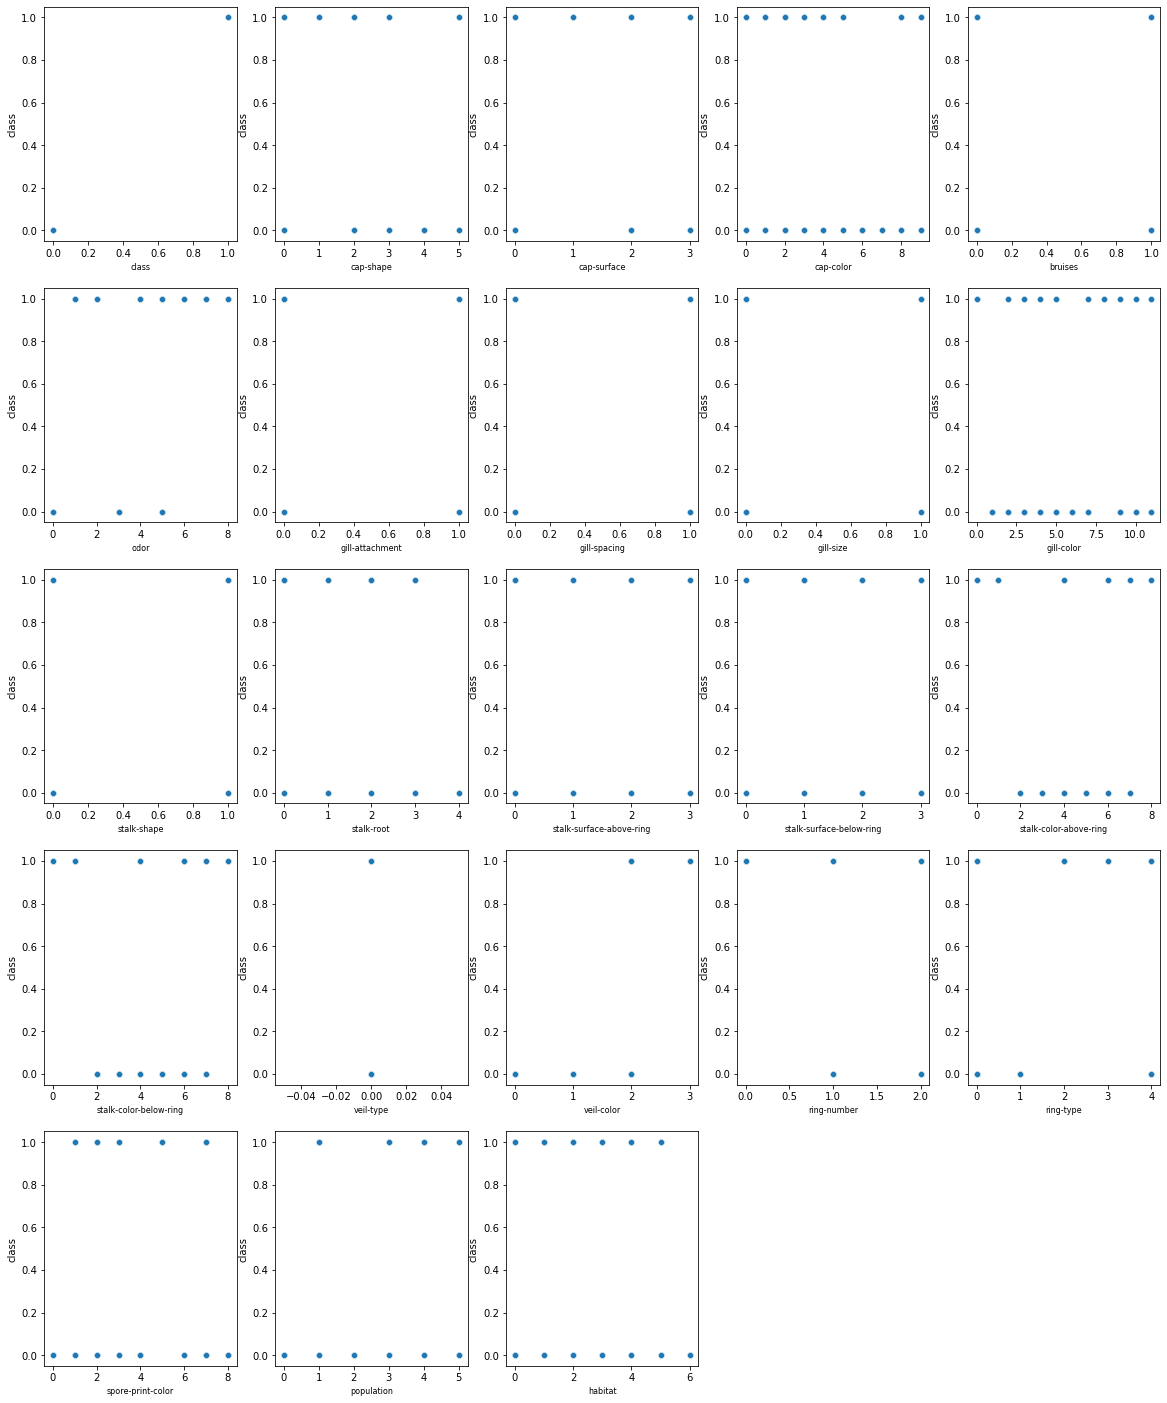

In [210]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<= 23 :
        ax=plt.subplot(5,5,plotnumber)
        sns.scatterplot(x=df[column],y="class",data=df)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show

In [211]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


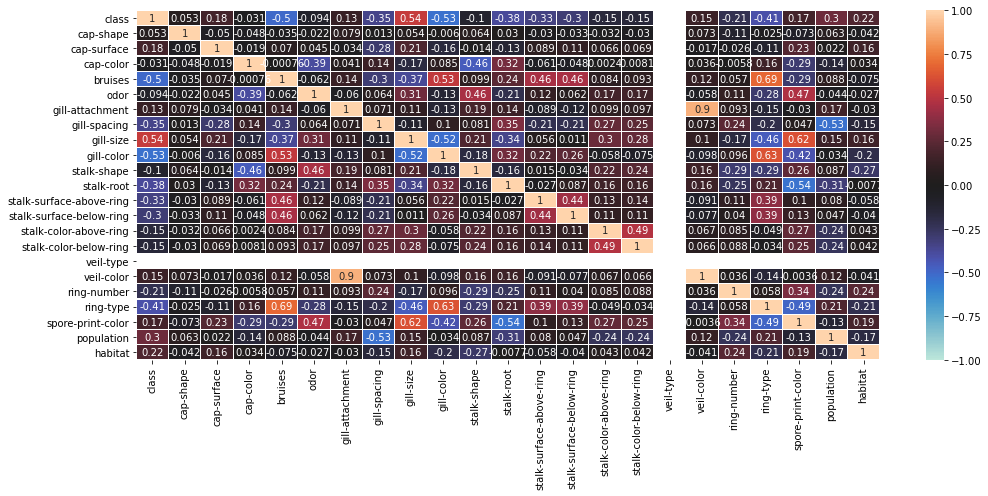

In [212]:
plt.figure(figsize=(15,7)) 
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,annot=True,fmt='.2g', linewidths=.1, )
plt.tight_layout()

In [213]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


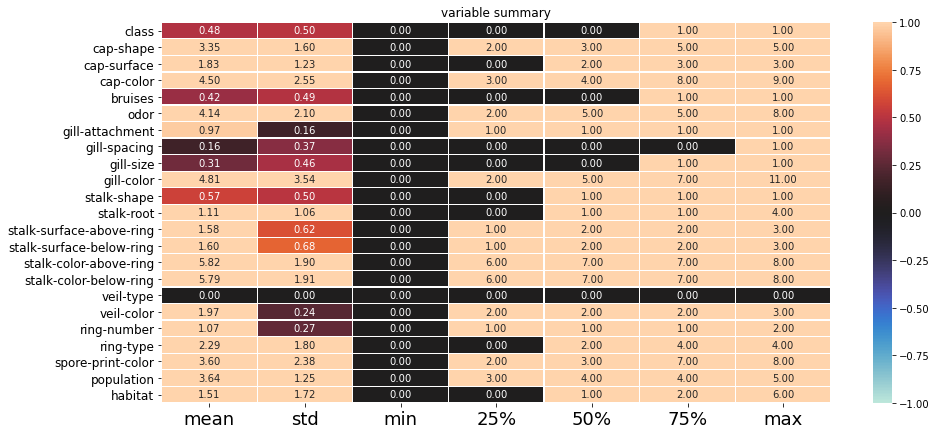

In [214]:
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=-1, vmax=1, center=0,annot=True,fmt='.2f', linewidths=.2, )
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

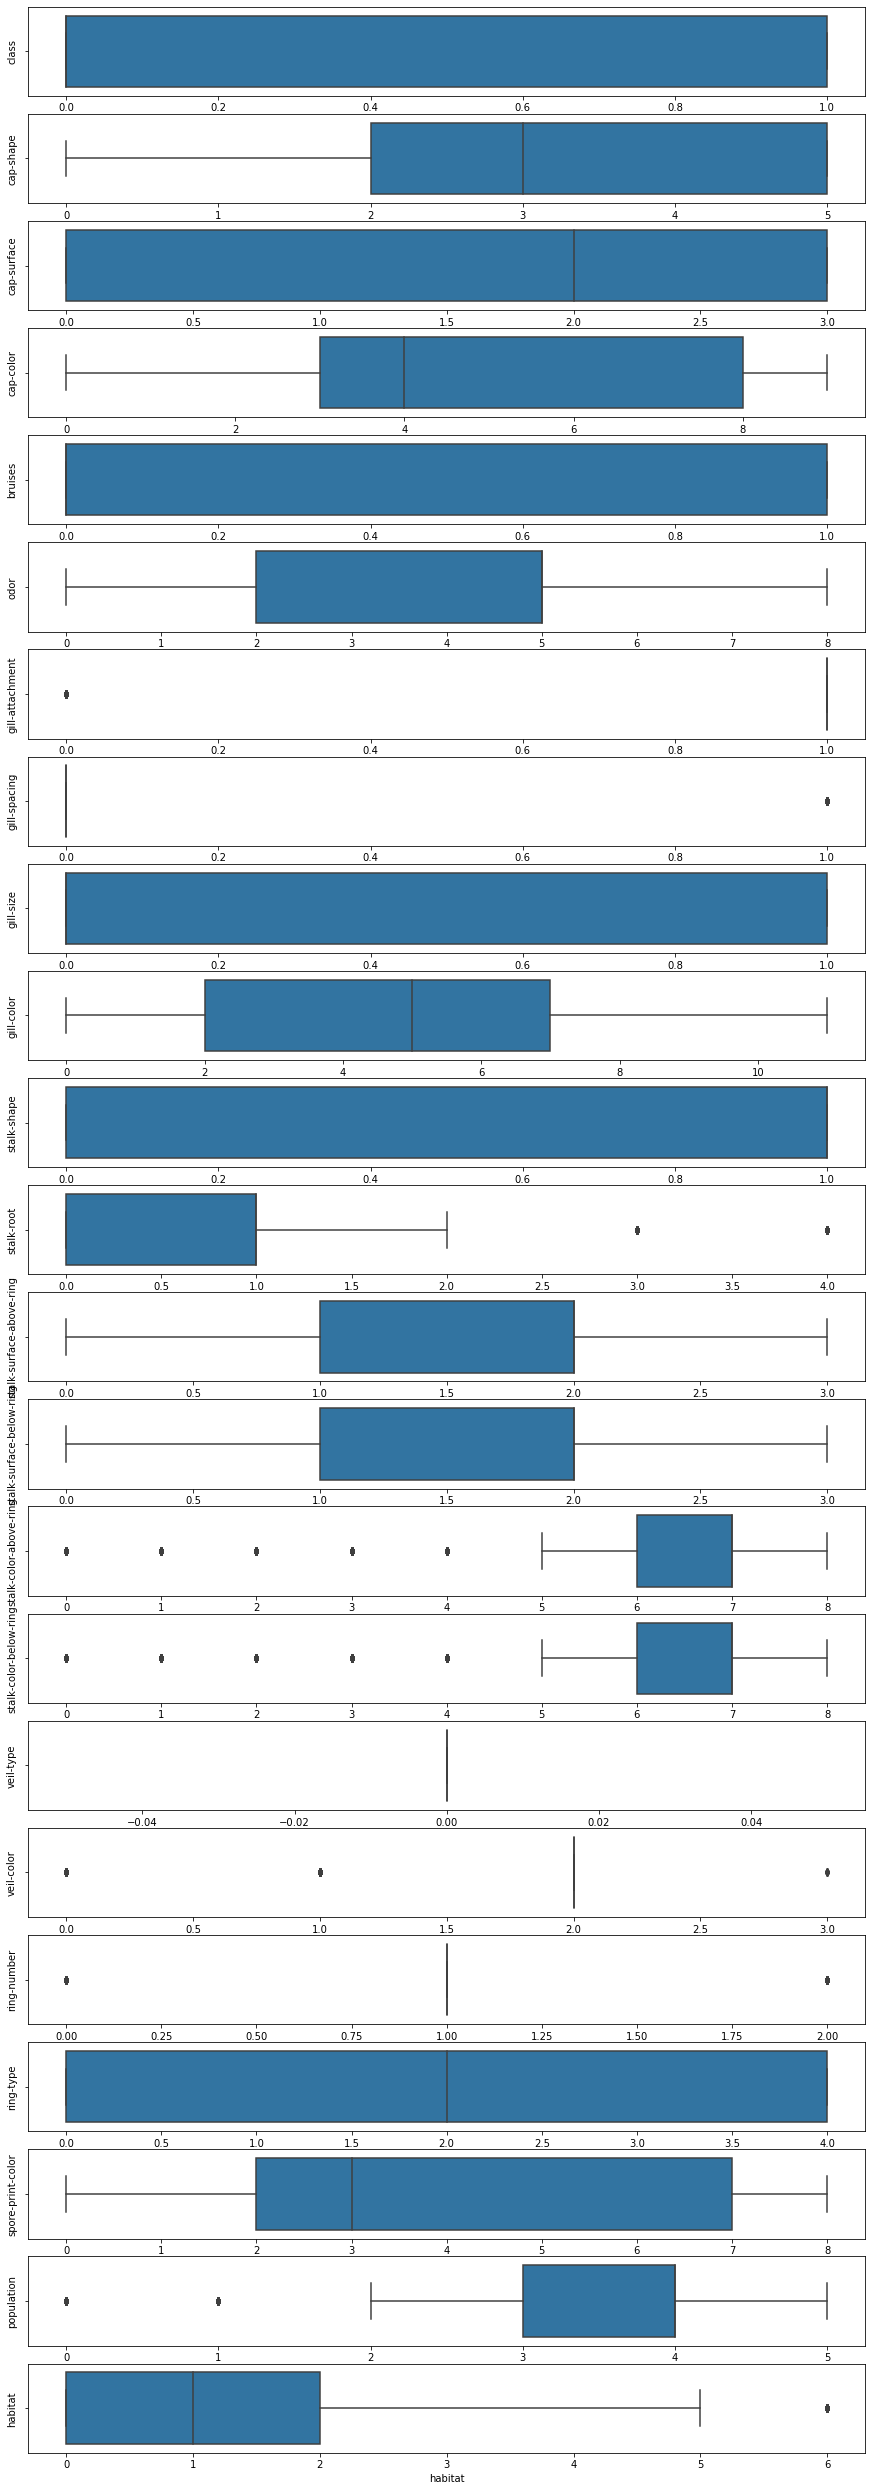

In [215]:
#check for outliers
num_cols=df.select_dtypes(include = np.number)
plt.figure(figsize=(15,45))
for i,col in enumerate(num_cols,1):
    plt.subplot(23,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

In [216]:
#Check for Skweness
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

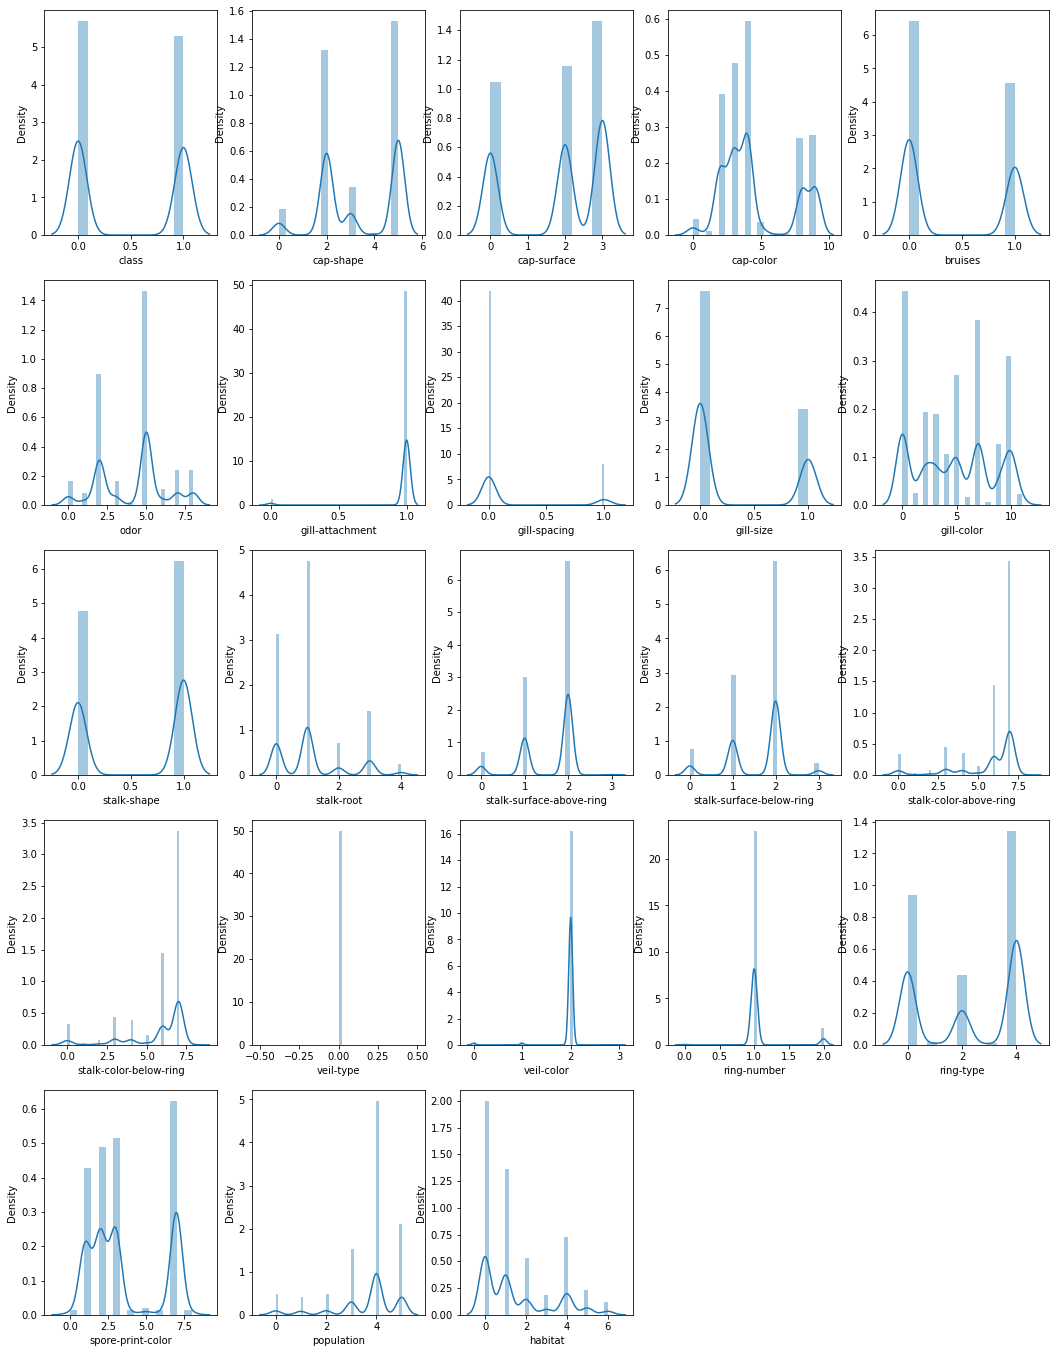

In [217]:
# check Correlation with Target Variable
plt.figure(figsize=(18,24),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<= 23 :
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show

In [218]:
#check for duplicate Rows
dups=df.duplicated()
print(dups.any())

False


In [219]:
# Check Strongly Related Features
cor = df.corr()
cor_target = abs(cor["class"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 class                       1.000000
bruises                     0.501530
gill-spacing                0.348387
gill-size                   0.540024
gill-color                  0.530566
stalk-root                  0.379361
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
ring-number                 0.214366
ring-type                   0.411771
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64 

Weak Relates:

 cap-shape                 0.052951
cap-surface               0.178446
cap-color                 0.031384
odor                      0.093552
gill-attachment           0.129200
stalk-shape               0.102019
stalk-color-above-ring    0.154003
stalk-color-below-ring    0.146730
veil-color                0.145142
spore-print-color         0.171961
Name: class, dtype: float64


In [220]:
df = df.drop(['ring-number','veil-color','veil-type','gill-spacing','gill-attachment'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-size                 8124 non-null   int32
 7   gill-color                8124 non-null   int32
 8   stalk-shape               8124 non-null   int32
 9   stalk-root                8124 non-null   int32
 10  stalk-surface-above-ring  8124 non-null   int32
 11  stalk-surface-below-ring  8124 non-null   int32
 12  stalk-color-above-ring    8124 non-null   int32
 13  stalk-color-below-ring    8124 non-null   int32
 14  ring-type                 8124 non-null 

In [221]:
z=np.abs(zscore(df))
z.shape

(8124, 18)

In [222]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, 2238, 2443, 2443, 2533, 2536, 2539, 2566, 2571,
       2594, 2697, 2766, 2770, 2926, 2937, 2990, 3001, 3003, 3017, 3027,
       3034, 3040, 3062, 3062, 3064, 3069, 3075, 3078, 3087, 3089, 3091,
       3091, 3093, 3102, 3109, 3122, 3141, 3159, 3161, 3187, 3187, 3188,
       3193, 3199, 3199, 3201, 3205, 3211, 3226, 3231, 3235, 3239, 3239,
       3243, 3248, 3265, 3274, 3280, 3284, 3304, 3328, 3328, 3334, 3349,
       3362, 3379, 3425, 3439, 3447, 3447, 3451, 3453, 3473, 3488, 3508,
       3511, 3522, 3533, 3565, 3567, 3581, 3581, 3597, 3599, 3604, 3606,
       3607, 3607, 3608, 3608, 3610, 3614, 3633, 3635, 3647, 3648, 3649,
       3653, 3654, 3654, 3658, 3661, 3661, 3667, 3675, 3675, 3694, 3701,
       3701, 3710, 3713, 3718, 3724, 3724, 3726, 3746, 3755, 3758, 3783,
       3787, 3790, 3808, 3829, 3835, 3840, 3854, 3871, 3889, 3890, 3890,
       3892, 3900, 3901, 3903, 3905, 3906, 3911, 3912, 3913, 3918, 3918,
       3919, 3921, 3925, 3925, 3926, 3926, 3927, 3

In [223]:
# Removing Outliers
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(7404, 18)


In [224]:
#divide Dataset in Feature and Target
y=df_new.iloc[:,0]
x=df_new.iloc[:,1:18]


In [225]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.0408437 ,  0.00343988,  0.02068491, ..., -0.721462  ,
        -0.71476415,  1.52004316],
       [ 1.0408437 ,  0.00343988,  1.65449191, ..., -0.15232994,
        -1.40270298,  0.13195676],
       [-1.99870914,  0.00343988,  1.3884266 , ..., -0.15232994,
        -1.40270298,  1.07722645],
       ...,
       [-0.84030651,  0.00343988,  0.02068491, ..., -2.8283337 ,
        -1.84703105,  0.7164589 ],
       [-0.22724197,  1.01788978,  0.02068491, ...,  1.24959778,
         0.23920865,  0.7164589 ],
       [ 1.0408437 ,  0.00343988,  0.02068491, ...,  0.29422564,
        -1.84703105,  0.7164589 ]])

In [226]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.0408437 ,  0.00343988,  0.02068491, ..., -0.721462  ,
        -0.71476415,  1.52004316],
       [ 1.0408437 ,  0.00343988,  1.65449191, ..., -0.15232994,
        -1.40270298,  0.13195676],
       [-1.99870914,  0.00343988,  1.3884266 , ..., -0.15232994,
        -1.40270298,  1.07722645],
       ...,
       [-0.84030651,  0.00343988,  0.02068491, ..., -2.8283337 ,
        -1.84703105,  0.7164589 ],
       [-0.22724197,  1.01788978,  0.02068491, ...,  1.24959778,
         0.23920865,  0.7164589 ],
       [ 1.0408437 ,  0.00343988,  0.02068491, ...,  0.29422564,
        -1.84703105,  0.7164589 ]])

In [227]:
# split Dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [228]:
# MOdel Building using Logistic Regression
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [229]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9205834683954619

In [240]:
pred_lr=regressor.predict(x_test)
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(regressor,x,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :", j)
    print("Cross Validation Score :", lsc*100)
    print("Cross Validation Score :", lss*100)
lsscore_selected=cross_val_score(regressor,x,y,cv=4).mean()
print("\n The CV Score is :", lsscore_selected,"\n The Accuracy Score is :",lss)

At CV : 2
Cross Validation Score : 70.35386277687736
Cross Validation Score : 92.05834683954619
At CV : 3
Cross Validation Score : 73.93300918422474
Cross Validation Score : 92.05834683954619
At CV : 4
Cross Validation Score : 74.43273905996759
Cross Validation Score : 92.05834683954619
At CV : 5
Cross Validation Score : 76.25169261090936
Cross Validation Score : 92.05834683954619
At CV : 6
Cross Validation Score : 80.71312803889789
Cross Validation Score : 92.05834683954619
At CV : 7
Cross Validation Score : 80.99290993954888
Cross Validation Score : 92.05834683954619
At CV : 8
Cross Validation Score : 79.9829256902691
Cross Validation Score : 92.05834683954619
At CV : 9
Cross Validation Score : 83.16848302569049
Cross Validation Score : 92.05834683954619

 The CV Score is : 0.7443273905996759 
 The Accuracy Score is : 0.9205834683954619


In [250]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[986,  76],
       [ 71, 718]], dtype=int64)

In [252]:
tp=conf_mat[0][0]
fp=conf_mat[0][1]
fn=conf_mat[1][0]
tn=conf_mat[1][1]

Accuracy=(tp+tn)/(tp+fp+fn+tn)
print("\nAccuracy :",Accuracy)

Precision=tp/(tp+fp)
print("\nPrecision :",Precision)

Recall=tp/(tp+fn)
print("\nRecall :", Recall)

F1_Score=2*(Recall*Precision)/(Recall+Precision)
print("\nF1 Score :",F1_Score)

auc=roc_auc_score(y_test,y_pred)
print("\nAUC :", auc)


Accuracy : 0.9205834683954619

Precision : 0.928436911487759

Recall : 0.9328287606433302

F1 Score : 0.930627654554035

AUC : 0.9192247928794943


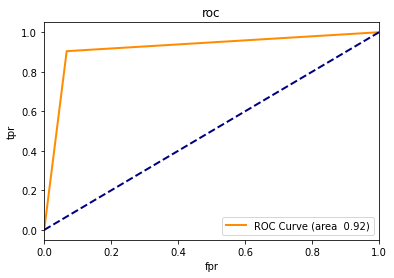

In [304]:
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve (area % 0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc')
plt.legend(loc="lower right")
plt.show()